# Social Networks and Text Analysis - Ranking algorithms


## 1. PageRank

Define a function that computes the Page Rank given an Adjacency matrix.

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
import re

#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
#Create a network:
G = nx.erdos_renyi_graph(n=100, p=0.2)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 984
Average degree:  19.6800


In [17]:
#Save the adjacency matrix:
Adj = nx.to_numpy_matrix(G).A

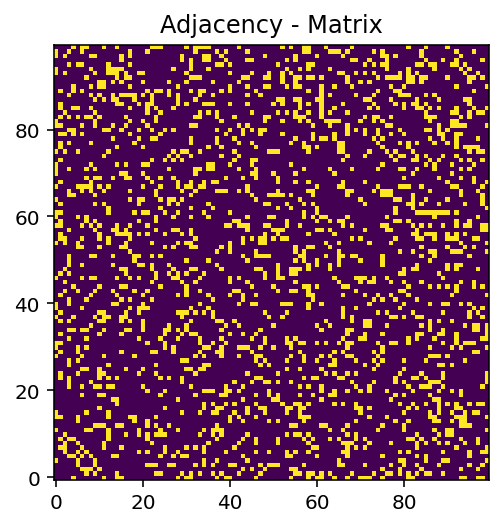

In [18]:
#Plot the matrix of zeros and ones:
plt.imshow(Adj, origin='lower', interpolation='nearest')
plt.title("Adjacency - Matrix")
plt.show()

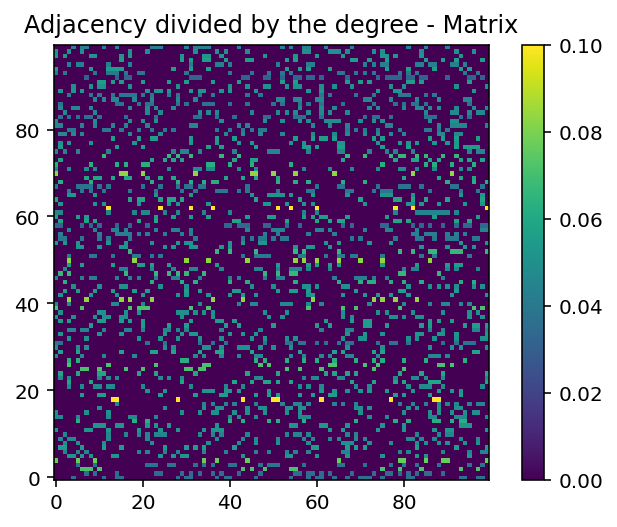

In [19]:
#Create the transition probabilities function. 
#Which is the adjacency divided by the degree of each node
#In this case is the row or the column (Because is undirected and simetrical)
R = Adj/Adj.sum(axis=1)[:,None]
plt.imshow(R, origin='lower', interpolation='nearest')
plt.title("Adjacency divided by the degree - Matrix")
plt.colorbar()
plt.show()

In [20]:
#Create your page rank function:
def Page_Rank(G):
    #Set the adjacency matrix
    Adj = nx.to_numpy_matrix(G).A
    
    #Divide the adjacency matrix by the degree of the node = sum of the columns by row:
    R = Adj/Adj.sum(axis=1)[:,None]
    
    #Compute the eigen values and eigenvectors for the corrected matrix
    eigen_values, eigenvectors = np.linalg.eig(R.T)
    
    #Select the largest eigenvalue
    ind = np.argmax(eigen_values)
    
    #Select the corresponding eigenvector:
    largest = np.array(eigenvectors[:, ind]).flatten().real
    
    #Normalize the vector:
    norm = float(largest.sum())
    
    #Return the values:
    return(dict(zip(G, map(float, largest / norm))))

In [21]:
#Check the values:
Page_Rank(G)

{0: 0.013719512195121948,
 1: 0.014227642276422757,
 2: 0.007113821138211382,
 3: 0.013211382113821134,
 4: 0.006605691056910564,
 5: 0.009654471544715446,
 6: 0.011178861788617876,
 7: 0.009146341463414644,
 8: 0.010162601626016251,
 9: 0.010670731707317074,
 10: 0.011178861788617888,
 11: 0.009654471544715437,
 12: 0.009654471544715446,
 13: 0.008130081300813012,
 14: 0.010670731707317065,
 15: 0.010162601626016265,
 16: 0.01016260162601625,
 17: 0.011178861788617885,
 18: 0.005081300813008127,
 19: 0.009146341463414628,
 20: 0.009654471544715444,
 21: 0.01067073170731707,
 22: 0.008638211382113821,
 23: 0.010670731707317065,
 24: 0.008638211382113825,
 25: 0.007113821138211386,
 26: 0.007113821138211376,
 27: 0.008130081300813012,
 28: 0.01067073170731707,
 29: 0.008638211382113826,
 30: 0.010162601626016258,
 31: 0.013211382113821137,
 32: 0.01016260162601625,
 33: 0.00965447154471545,
 34: 0.01117886178861789,
 35: 0.00914634146341463,
 36: 0.009146341463414625,
 37: 0.01016260162

Define a function that computes topic specific Page Rank following the advice of Prof.  Leskovec:

In [22]:
#Create your topic page rank function:
def Topic_Specific_Page_Rank(G, special_Set,Beta):
    #Set the adjacency matrix
    Adj = nx.to_numpy_matrix(G).A
    
    #Divide the adjacency matrix by the degree of the node = sum of the columns by row:
    R = Adj/Adj.sum(axis=1)[:,None]
    
    for i,row in enumerate(R):
        if i in special_Set:
            R[i] = Beta*row+(1-Beta)/len(special_Set)
        else:
            R[i] = Beta*row
            
    plt.imshow(R, origin='lower', interpolation='nearest')
    plt.title("Adjacency divided by the degree with the specific Set - Matrix")
    plt.xlabel('ID')
    plt.ylabel('ID')
    plt.colorbar()
    plt.show()
    #----------------------------------------
    #This part comes from the other function:
    #----------------------------------------
    #Compute the eigen values and eigenvectors for the corrected matrix
    eigen_values, eigenvectors = np.linalg.eig(R.T)
    
    #Select the largest eigenvalue
    ind = np.argmax(eigen_values)
    
    #Select the corresponding eigenvector:
    largest = np.array(eigenvectors[:, ind]).flatten().real
    
    #Normalize the vector:
    norm = float(largest.sum())
    
    #Return the values:
    return(dict(zip(G, map(float, largest / norm))))

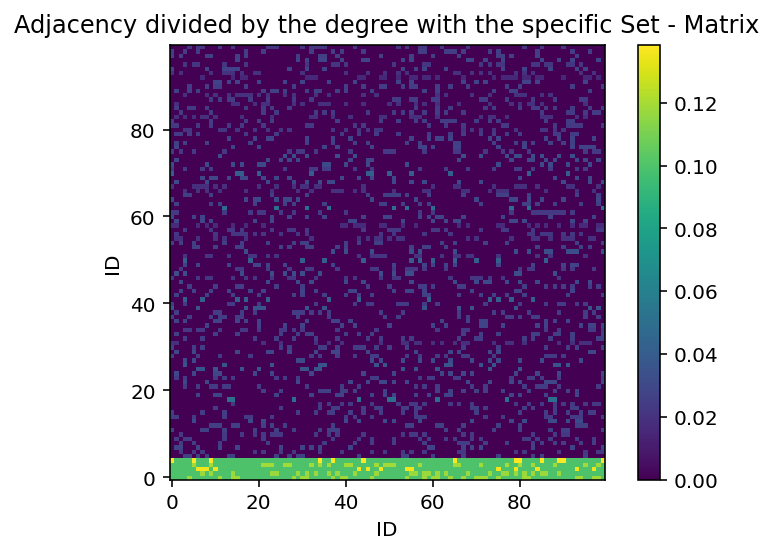

{0: 0.011868705239859978,
 1: 0.01198243758949304,
 2: 0.008543687744099894,
 3: 0.011688112491347736,
 4: 0.00824670688447982,
 5: 0.009871976103171715,
 6: 0.010525412724103593,
 7: 0.009615520769779836,
 8: 0.010030633551741039,
 9: 0.01026800400819834,
 10: 0.010547918774734365,
 11: 0.009817395147740023,
 12: 0.009827915187488549,
 13: 0.009180987961199693,
 14: 0.010178000403744057,
 15: 0.010191755124679285,
 16: 0.010074676698201779,
 17: 0.010519468336181668,
 18: 0.00765407481664473,
 19: 0.00955925779521534,
 20: 0.01000417619656478,
 21: 0.010234021738416367,
 22: 0.009390090227558587,
 23: 0.010314443547883606,
 24: 0.009379682880632232,
 25: 0.008507627075963165,
 26: 0.008659326138593508,
 27: 0.0090943402366406,
 28: 0.010356705799016108,
 29: 0.009373871372238468,
 30: 0.010193798500368011,
 31: 0.011686707086655942,
 32: 0.010001172038561098,
 33: 0.00962454203068922,
 34: 0.010682092785084422,
 35: 0.00979687061720993,
 36: 0.009677859512826842,
 37: 0.01010294384749

In [23]:
#Run the function and plot the matrix:
#Change the special set to random nodes!
Topic_Specific_Page_Rank(G, special_Set=list(range(5)),Beta=0.5)

# 2. LexRank

Define the LexRank function.  Select a piece of text (10-20 sentences) that you would like to summarize.  Thereare two parameters you can vary:

<ol>
 <li>the cosine similarity threshold determines how similar two sentences have to be in order to share and edge.</li>
 <li>the salience threshold determines how high a sentence’s PageRank has to be in order for that sentence tobe included in the summary.</li>
</ol>


Cosine similarity function for two vectors:

\begin{equation} similarity = \cos ({\theta})= {{\bf A}\cdot {\bf B} \over \|{\bf A}\| \|{\bf B}\|} = \frac{ \sum_{i=1}^{n}{{\bf A}_i{\bf B}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf A}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf B}_i)^2}} } \end{equation}

In [24]:
with open('Text.txt') as f: #<-- #Read the piece of text: INVISIBLE WOMEN.
    text = f.read()
#Separate the text into sentences by the dot:
List_Sentences = text.split('.')

In [25]:
from collections import Counter #<-function for counting frequency in an array

#1. We need to convert the text to vector of words with the frequency of ech word.
def get_vector_of_words(text):
    Words = re.findall(r'\w+', text)
    Words_Frequency = Counter(Words)
    return(Words_Frequency)

#Example with the first sentence:
get_vector_of_words(List_Sentences[0])

Counter({'When': 1,
         'Hillary': 1,
         'Clinton': 1,
         'wanted': 1,
         'to': 1,
         'speak': 1,
         'about': 1,
         'women': 1,
         's': 1,
         'rights': 1,
         'at': 1,
         'the': 1,
         '1995': 1,
         'United': 1,
         'Nations': 1,
         'Fourth': 1,
         'World': 1,
         'Conference': 1,
         'on': 1,
         'Women': 1,
         'in': 1,
         'Beijing': 1,
         'even': 1,
         'her': 1,
         'own': 1,
         'side': 1,
         'was': 1,
         'dubious': 1})

In [26]:
#2. Compute the cosine similarity:
def Cosine_Similarity(vec_1, vec_2):
    #Get the bag words with all the words:
    Bag_words = set(set(vec_1.keys()).union(set(vec_2.keys())))
    
    #Multiply the number of times that the words appear in both texts:
    Dot_multiplication = sum([vec_1[w]*vec_2[w] for w in Bag_words if w in vec_1 and w in vec_2])
    
    
    #Multiply the norms of each vector:
    Sum_Vec_1 = np.sqrt(sum([vec_1[w]**2 for w in vec_1.keys()]))
    Sum_Vec_2 = np.sqrt(sum([vec_2[w]**2 for w in vec_2.keys()]))
    Norm_multiplication = Sum_Vec_1*Sum_Vec_2
    if Norm_multiplication != 0:
        return(Dot_multiplication/Norm_multiplication)
    else:
        return(np.nan)
    

In [27]:
#Example for the first two sentences:
vec_1 = get_vector_of_words(List_Sentences[1])
vec_2 = get_vector_of_words(List_Sentences[0])
Cosine_Similarity(vec_1, vec_2)

0.27940948018117095

In [28]:
#3. Create the Lex-Rank function:
def LexRank(List_Sentences, c_t, s_t):
    #Create the empty network:
    G = nx.Graph()
    
    #Iterate over all the sentences:
    for n1 in range(len(List_Sentences)):
        for n2 in range(len(List_Sentences)):
            
            #Avoid overwrite links and create loops:
            if n1 != n2 and (n1,n2) not in G.edges():
                
                #Compute the cosine similarity:
                vec_1 = get_vector_of_words(List_Sentences[n1])
                vec_2 = get_vector_of_words(List_Sentences[n2])
                Cos_Sim = Cosine_Similarity(vec_1, vec_2)
                
                #Add the edge just if the cosine similarity is larger than the threshold:
                if Cos_Sim > c_t:
                    G.add_edge(n1,n2, weight =Cos_Sim)
                    
                    for node in [n1,n2]:
                        if 'Sentence' not in G.nodes[node].keys():
                            G.nodes[node]['Sentence'] = List_Sentences[node]
    print(nx.info(G))
    
    #Compute the pagerank of the network.
    #Select the nodes in the threshold for the summary:
    PR = nx.pagerank(G)
    #Select the nodes that overpass the threshold:
    Selected_Nodes = {u:v for u,v in PR.items() if v>s_t}
    print('')
    print('Selected nodes by Page-Rank:')
    print(Selected_Nodes)
    print({i: G.nodes[i]['Sentence'] for i in Selected_Nodes})
    
    #Draw the network and highlight in red the selected nodes:
    color = ['darkred' if n in Selected_Nodes.keys() else 'darkblue' for n in G.nodes()]
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx(G,pos=pos, node_color = color, alpha=0.8, edge_color='white', font_color='white')
    nx.draw_networkx_edges(G, pos=pos, alpha=0.5)
    plt.show()

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 22
Average degree:   4.4000

Selected nodes by Page-Rank:
{1: 0.18907601194178875, 2: 0.14916347479628145, 5: 0.1281720056217984, 7: 0.10574181783845728, 10: 0.12766858232268122}
{1: ' ‘People were saying: “This is a not an important issue for the US government, it’s a nice thing and I’m glad you care about it, but if the First Lady of the United States goes and actually speaks about women’s rights, that elevates an issue that in the midst of everything else going on – the collapse of the USSR and the transition of the former Soviet states and Warsaw Pact nations and Rwanda and Bosnia, there was so much else going on in the world – maybe you should speak about it from afar', 2: '”’ As we will see (and as the US administration already knew at the time) what was ‘going on’ in Rwanda and Bosnia was the mass and systematic rape of women', 5: ' Because if we are reticent to include “women’s perspectives and address women’s needs when t

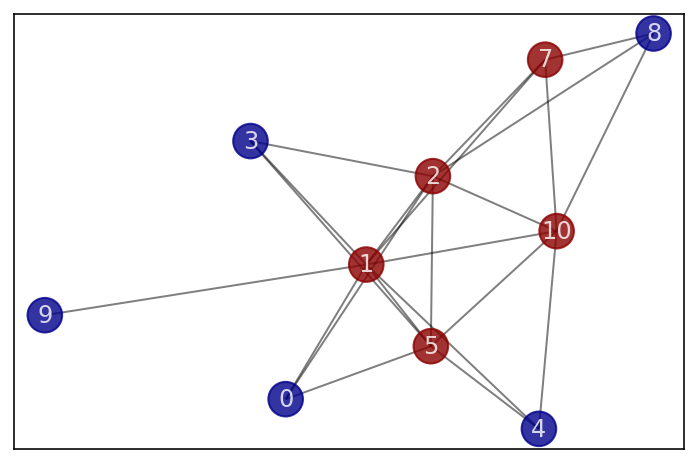

In [29]:
# 3. Set the threshold:
Cosine_Threshold = 0.2
Salience_Threshold = 0.1
LexRank(List_Sentences, Cosine_Threshold, Salience_Threshold)